<a href="https://colab.research.google.com/github/willycoy/Violencia_Tunja/blob/main/Casos_Violencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CASOS DE VIOLENCIA CONTRA LA MUJER EN TUNJA

**OpenRefine**

Modificacion de la columna *FECHA_ DE_ LA_ DENUNCIA*
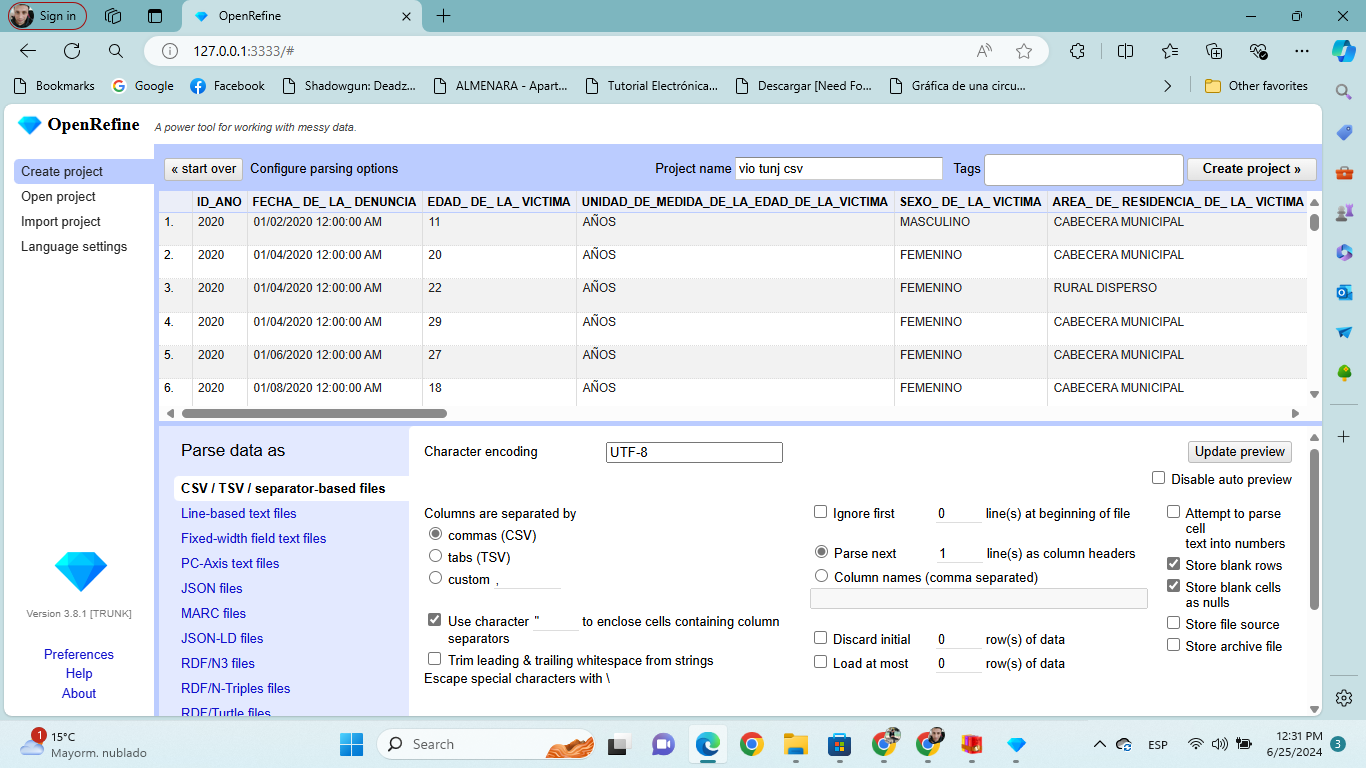

Editar la columna **FECHA_ DE_ LA_ DENUNCIA** en columna **FECHA dd/mm/aa**

**Comando**: *value.split(" ")[0]*, el cual selecciona la primera cadena antes de un especio

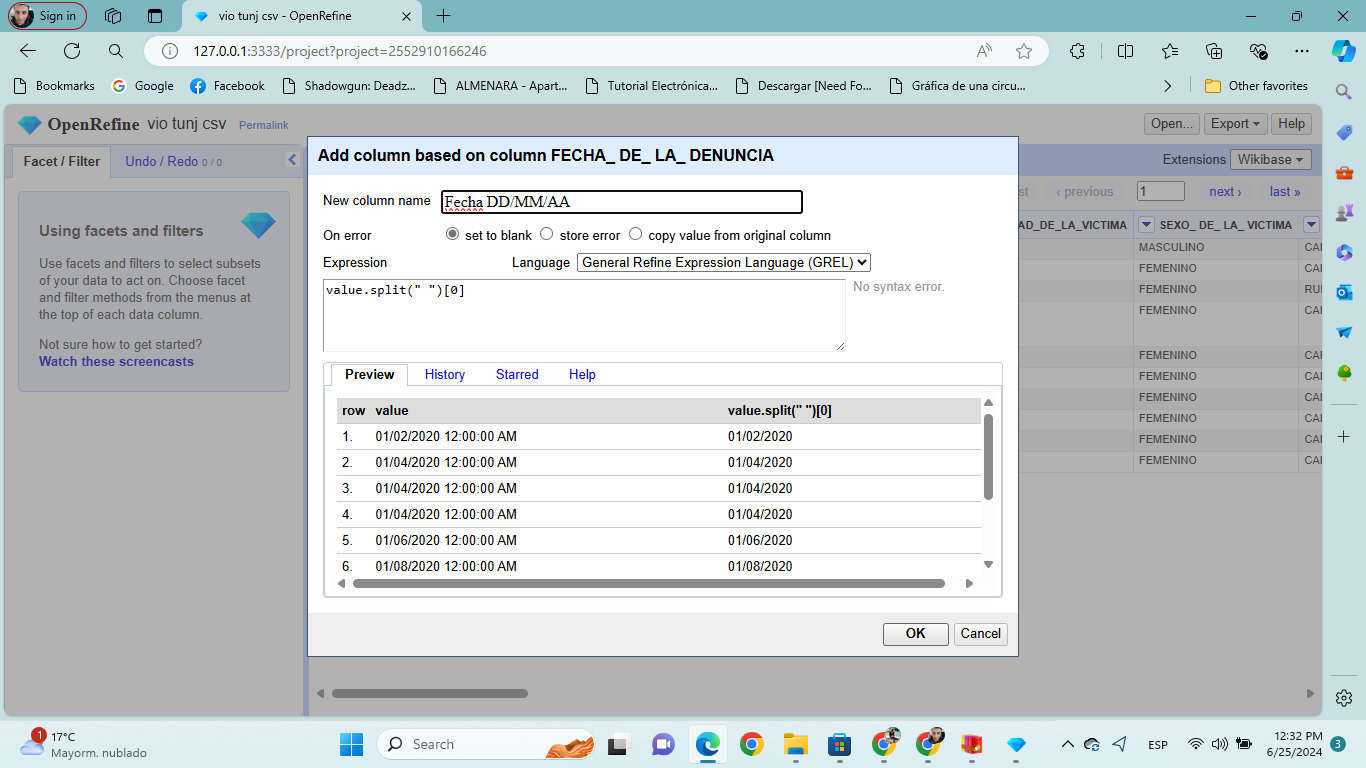

Editar la columna **FECHA_ DE_ LA_ DENUNCIA** en columna HORA

**Comando:** *value.split(" ")[1] + " " + value.split(" ")[2]*, el cual selecciona la segunda y tercera cadena despues del primer especio.

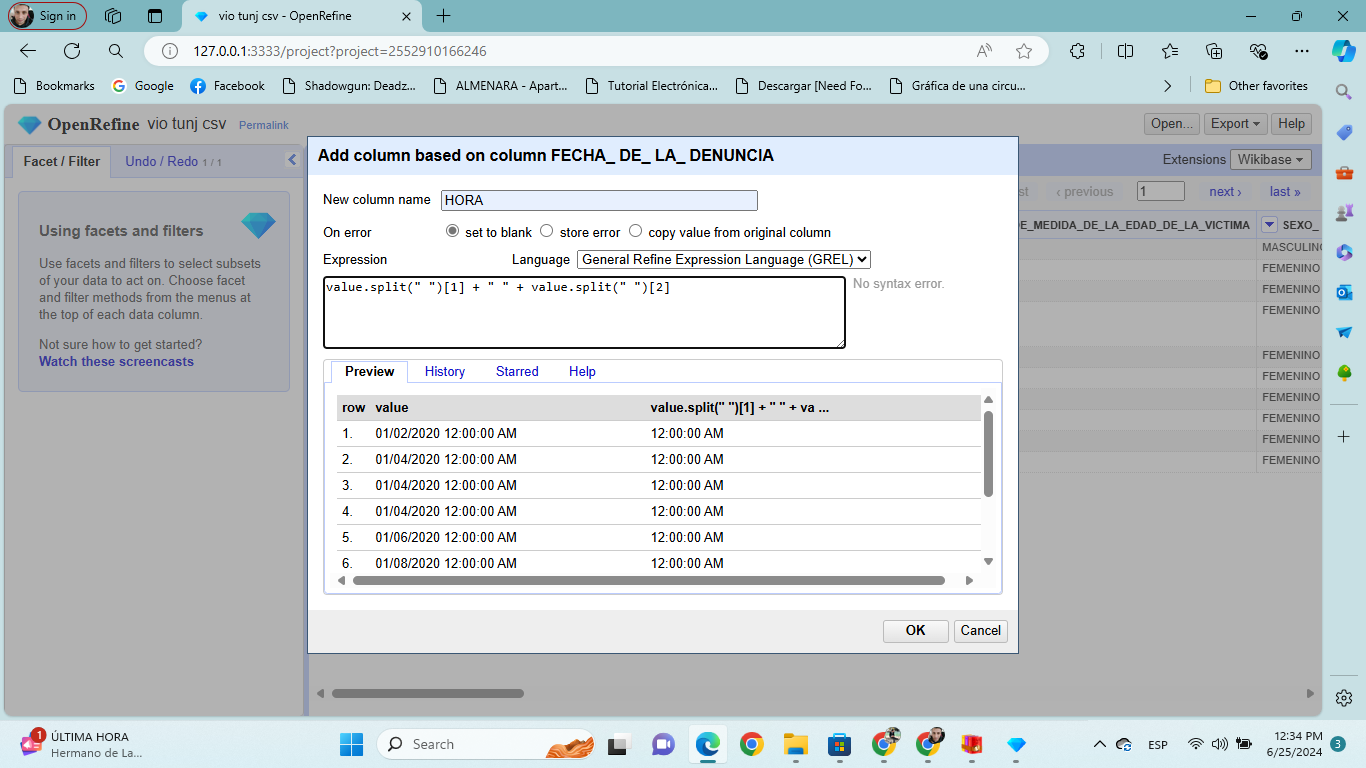

**DataFrame Final**

*con la adición de unas nuevas columnas llamadas:*

***FECHA DD/MM/AA**

***HORA**

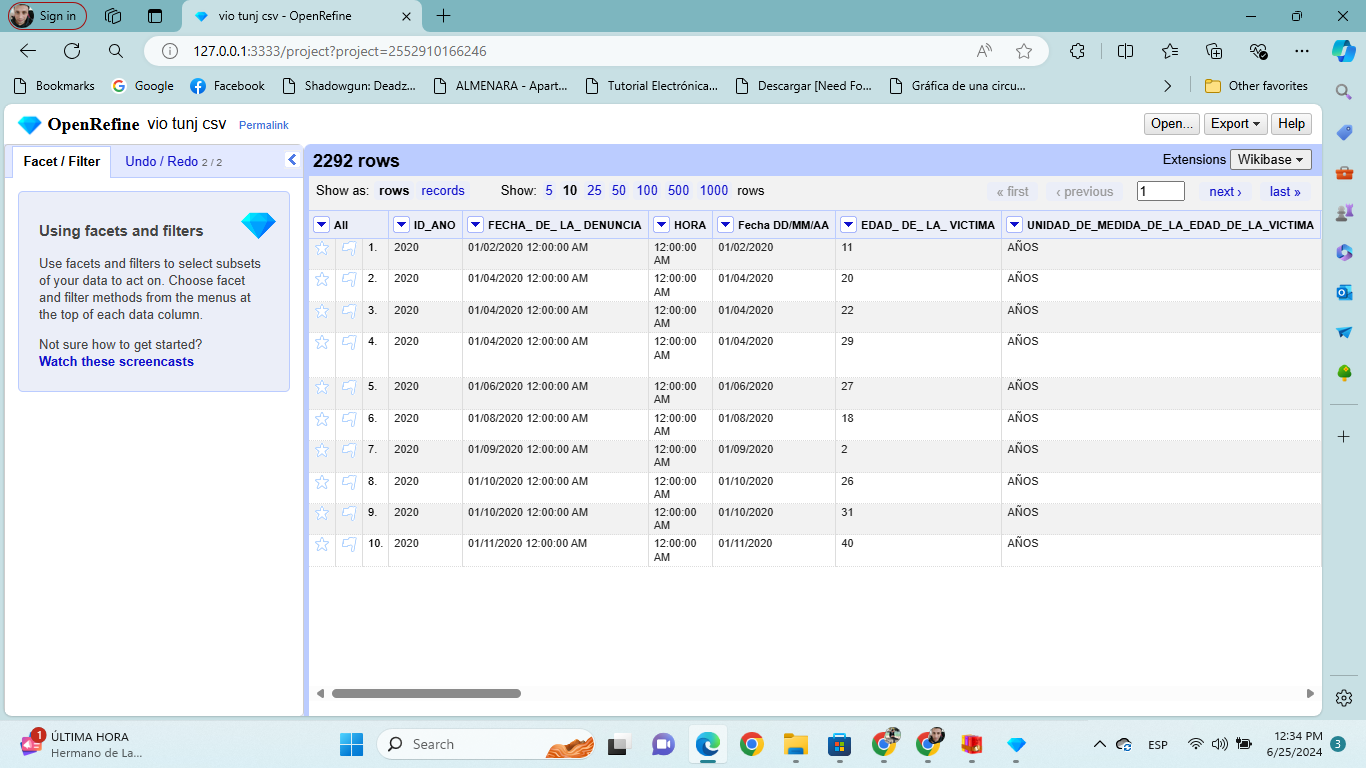

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

#Desarrollo analitico sobre la basa de datos:
**Violencia de genero en Tunja**

**Importación de Librerias**



In [ ]:
import pandas as pd
import numpy as np
from pickle import TRUE
import matplotlib.pyplot as plt
import seaborn as sns


*Documentos del Repositorio Github*

In [ ]:
# Extraccion de los dataset desde Github
url_1 = 'https://raw.githubusercontent.com/willycoy/Violencia_Tunja/main/vio_tunj.csv'
url_2 = 'https://raw.githubusercontent.com/willycoy/Violencia_Tunja/main/INFO_BARRIOS.csv'


# Variables para los dataset
data = pd.read_csv(url_1)
info_barrio = pd.read_csv(url_2)


**Lectura del DataFrame**

In [ ]:
# Informacion general del dataset Violencia de Genero en Tunja
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID_ANO                                        2292 non-null   int64  
 1   FECHA_ DE_ LA_ DENUNCIA                       2292 non-null   object 
 2   EDAD_ DE_ LA_ VICTIMA                         2292 non-null   int64  
 3   UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA     2292 non-null   object 
 4   SEXO_ DE_ LA_ VICTIMA                         2292 non-null   object 
 5   AREA_ DE_ RESIDENCIA_ DE_ LA_ VICTIMA         2292 non-null   object 
 6   BARRIO_ DE_ LA_ VICTIMA                       2292 non-null   object 
 7   SEGURIDAD_ SOCIAL_ DE_ LA_ VICTIMA            2292 non-null   object 
 8   ESTRATO_SOCIECONOMICO_ DE_ LA_ VICTIMA        2291 non-null   float64
 9   ORIENTACION_ SEXUAL_ DE _LA_ VICTIMA          2292 non-null   o

*Dimensiones del Dataset*

In [ ]:
data.shape

(2292, 23)



---



*LIMIPIEZA DEL DATASET*

In [ ]:
# Eliminacion del espacio en blanco en el nombre de las columnas
data.columns = [col.strip().replace(' ', '_').upper() for col in data.columns]
data.columns

Index(['ID_ANO', 'FECHA__DE__LA__DENUNCIA', 'EDAD__DE__LA__VICTIMA',
       'UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA', 'SEXO__DE__LA__VICTIMA',
       'AREA__DE__RESIDENCIA__DE__LA__VICTIMA', 'BARRIO__DE__LA__VICTIMA',
       'SEGURIDAD__SOCIAL__DE__LA__VICTIMA',
       'ESTRATO_SOCIECONOMICO__DE__LA__VICTIMA',
       'ORIENTACION__SEXUAL__DE__LA__VICTIMA',
       'IDENTIDAD__DE__GENERO__DE__LA__VICTIMA',
       'CONSUMO__DE__SPA__DE__LA__VICTIMA',
       'VICTIMA__CON__JEFATURA__DE__HOGAR', 'ANTECEDENTES__DE__VIOLENCIA',
       'PRESENCIA__DE__ALCOHOL__U__OTRAS__SUSTANCIAS', 'SEXO__DEL__AGRESOR',
       'RELACION__CON__LA__VICTIMA', 'CONVIVE__CON__EL__AGRESOR',
       'RELACION__NO__FAMILIAR', 'MECANISMO__UTILIZADO__PARA__LA__AGRESION',
       'FECHA__DEL__HECHO', 'ESCENARIO', 'AMBITO__O__LUGAR'],
      dtype='object')

In [ ]:
data.columns = [col.replace('__','_') for col in data.columns]
data.dtypes

,0
ID_ANO,int64
FECHA_DE_LA_DENUNCIA,object
EDAD_DE_LA_VICTIMA,int64
UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA,object
SEXO_DE_LA_VICTIMA,object
AREA_DE_RESIDENCIA_DE_LA_VICTIMA,object
BARRIO_DE_LA_VICTIMA,object
SEGURIDAD_SOCIAL_DE_LA_VICTIMA,object
ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA,float64
ORIENTACION_SEXUAL_DE_LA_VICTIMA,object


In [ ]:
data.dtypes

,0
ID_ANO,int64
FECHA_DE_LA_DENUNCIA,object
EDAD_DE_LA_VICTIMA,int64
UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA,object
SEXO_DE_LA_VICTIMA,object
AREA_DE_RESIDENCIA_DE_LA_VICTIMA,object
BARRIO_DE_LA_VICTIMA,object
SEGURIDAD_SOCIAL_DE_LA_VICTIMA,object
ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA,float64
ORIENTACION_SEXUAL_DE_LA_VICTIMA,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID_ANO                                     2292 non-null   int64  
 1   FECHA_DE_LA_DENUNCIA                       2292 non-null   object 
 2   EDAD_DE_LA_VICTIMA                         2292 non-null   int64  
 3   UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA  2292 non-null   object 
 4   SEXO_DE_LA_VICTIMA                         2292 non-null   object 
 5   AREA_DE_RESIDENCIA_DE_LA_VICTIMA           2292 non-null   object 
 6   BARRIO_DE_LA_VICTIMA                       2292 non-null   object 
 7   SEGURIDAD_SOCIAL_DE_LA_VICTIMA             2292 non-null   object 
 8   ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA        2291 non-null   float64
 9   ORIENTACION_SEXUAL_DE_LA_VICTIMA           2292 non-null   object 
 10  IDENTIDAD_DE_GENERO_DE_L

In [ ]:
# Busque de valores NULL
null_values = data.isnull().sum()
null_values

,0
ID_ANO,0
FECHA_DE_LA_DENUNCIA,0
EDAD_DE_LA_VICTIMA,0
UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA,0
SEXO_DE_LA_VICTIMA,0
AREA_DE_RESIDENCIA_DE_LA_VICTIMA,0
BARRIO_DE_LA_VICTIMA,0
SEGURIDAD_SOCIAL_DE_LA_VICTIMA,0
ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA,1
ORIENTACION_SEXUAL_DE_LA_VICTIMA,0


*lIMIPIEZA DE DATOS NULOS*

In [ ]:

data = data.dropna(how='any').copy()
null_data = data.isnull().sum()
null_data


,0
ID_ANO,0
FECHA_DE_LA_DENUNCIA,0
EDAD_DE_LA_VICTIMA,0
UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA,0
SEXO_DE_LA_VICTIMA,0
AREA_DE_RESIDENCIA_DE_LA_VICTIMA,0
BARRIO_DE_LA_VICTIMA,0
SEGURIDAD_SOCIAL_DE_LA_VICTIMA,0
ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA,0
ORIENTACION_SEXUAL_DE_LA_VICTIMA,0


In [ ]:
datasinull = data.dropna()
datasinull


,ID_ANO,FECHA_DE_LA_DENUNCIA,EDAD_DE_LA_VICTIMA,UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA,SEXO_DE_LA_VICTIMA,AREA_DE_RESIDENCIA_DE_LA_VICTIMA,BARRIO_DE_LA_VICTIMA,SEGURIDAD_SOCIAL_DE_LA_VICTIMA,ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA,ORIENTACION_SEXUAL_DE_LA_VICTIMA,...,ANTECEDENTES_DE_VIOLENCIA,PRESENCIA_DE_ALCOHOL_U_OTRAS_SUSTANCIAS,SEXO_DEL_AGRESOR,RELACION_CON_LA_VICTIMA,CONVIVE_CON_EL_AGRESOR,RELACION_NO_FAMILIAR,MECANISMO_UTILIZADO_PARA_LA_AGRESION,FECHA_DEL_HECHO,ESCENARIO,AMBITO_O_LUGAR
0,2020,01/02/2020 12:00:00 AM,11,AÑOS,MASCULINO,CABECERA MUNICIPAL,COLINAS DE SUE,CONTRIBUTIVO,3.0,HETEROSEXUAL,...,NO,SI,MASCULINO,PAREJA,SI,NO,CONTUNDENTE,01/01/2020 12:00:00 AM,OTRO,OTROS AMBITOS
1,2020,01/04/2020 12:00:00 AM,20,AÑOS,FEMENINO,CABECERA MUNICIPAL,SANTA LUCIA,SUBSIDIADO,2.0,HETEROSEXUAL,...,NO,NO,MASCULINO,EX PAREJA,NO,NO,CONTUNDENTE,01/02/2020 12:00:00 AM,VÍA PUBLICA,OTROS AMBITOS
2,2020,01/04/2020 12:00:00 AM,22,AÑOS,FEMENINO,RURAL DISPERSO,LA CABAÑA,SUBSIDIADO,2.0,HETEROSEXUAL,...,SI,NO,MASCULINO,PAREJA,SI,NO,CONTUNDENTE,01/04/2020 12:00:00 AM,VIVIENDA,HOGAR
3,2020,01/04/2020 12:00:00 AM,29,AÑOS,FEMENINO,CABECERA MUNICIPAL,LAS NIEVES,SUBSIDIADO,1.0,HETEROSEXUAL,...,NO,NO,MASCULINO,PAREJA,SI,NO,AHORCAMIENTO,09/20/2019 12:00:00 AM,OTROS ESPACIOS ABIERTOS,OTROS AMBITOS
4,2020,01/06/2020 12:00:00 AM,27,AÑOS,FEMENINO,CABECERA MUNICIPAL,EL CURUBAL,CONTRIBUTIVO,2.0,HETEROSEXUAL,...,SI,NO,MASCULINO,PAREJA,SI,NO,CONTUNDENTE,01/06/2020 12:00:00 AM,VIVIENDA,HOGAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,2024,03/30/2024 12:00:00 AM,17,AÑOS,FEMENINO,CABECERA MUNICIPAL,EL PARAISO,CONTRIBUTIVO,3.0,HETEROSEXUAL,...,NO,NO,FEMENINO,MADRE,SI,NO APLICA,CONTUNDENTE,03/30/2024 12:00:00 AM,VIVIENDA,HOGAR
2288,2024,03/30/2024 12:00:00 AM,9,AÑOS,MASCULINO,CABECERA MUNICIPAL,JOSE JOAQUIN CAMACHO,CONTRIBUTIVO,3.0,ASEXUAL,...,NO,NO,MASCULINO,NINGUNO,NO,COMPAÑERO(A) DE ESTUDIO,OTROS MECANISMOS,02/05/2024 12:00:00 AM,ESTABLECIMIENTO EDUCATIVO,ESCOLAR
2289,2024,03/31/2024 12:00:00 AM,31,AÑOS,FEMENINO,CABECERA MUNICIPAL,EL DORADO,CONTRIBUTIVO,1.0,HETEROSEXUAL,...,SI,NO,MASCULINO,PAREJA,SI,NO APLICA,CONTUNDENTE,03/30/2024 12:00:00 AM,VIVIENDA,HOGAR
2290,2024,03/31/2024 12:00:00 AM,38,AÑOS,FEMENINO,RURAL DISPERSO,RUNTA,SUBSIDIADO,1.0,HETEROSEXUAL,...,NO,NO,MASCULINO,PAREJA,SI,NO APLICA,CONTUNDENTE,03/31/2024 12:00:00 AM,VIVIENDA,HOGAR


**Conversion de object a datatime64 en la columna FECHA_DE_LA_DENUNCIA**

In [ ]:
datasinull['FECHA_DE_LA_DENUNCIA'] = pd.to_datetime(datasinull['FECHA_DE_LA_DENUNCIA'], format='%d/%m/%Y', errors='coerce')
datasinull['FECHA_DEL_HECHO'] = pd.to_datetime(datasinull['FECHA_DEL_HECHO'], format='%d/%m/%Y', errors='coerce')
datasinull.dtypes

,0
ID_ANO,int64
FECHA_DE_LA_DENUNCIA,datetime64[ns]
EDAD_DE_LA_VICTIMA,int64
UNIDAD_DE_MEDIDA_DE_LA_EDAD_DE_LA_VICTIMA,object
SEXO_DE_LA_VICTIMA,object
AREA_DE_RESIDENCIA_DE_LA_VICTIMA,object
BARRIO_DE_LA_VICTIMA,object
SEGURIDAD_SOCIAL_DE_LA_VICTIMA,object
ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA,float64
ORIENTACION_SEXUAL_DE_LA_VICTIMA,object




---



# VIOLENCIA DE GENERO

In [ ]:
dta1 = pd.DataFrame(datasinull['SEXO_DE_LA_VICTIMA'].value_counts())
dta1 = dta1.reset_index()
dta1.columns=['Genero', 'Total']
dta1

,Genero,Total
0,FEMENINO,1918
1,MASCULINO,372


<ipython-input-38-3787b2246a22>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genero', y='Total', data=dta1,
<ipython-input-38-3787b2246a22>:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x='Genero', y='Total', data=dta1,


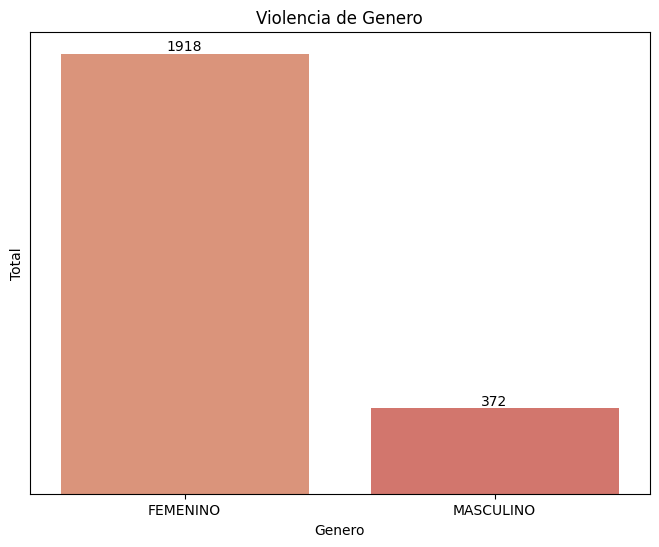

In [ ]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette('flare')
sns.barplot(x='Genero', y='Total', data=dta1,
            palette=colors,
            estimator='sum', errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.yticks([])


# Agregar etiquetas y título
plt.xlabel('Genero')
plt.ylabel('Total')
plt.title('Violencia de Genero')
plt.show()

Conclusión:

- En el gráfico de barras sobre *Violencia de Género en Tunja*, podemos identificar que la gran mayoría de casos de violencia están presente en el género femenino, con un total de 1918 casos denunciados.


- Por otro lado, se visibilización casos de violencia de género masculino, con un total de 372 casos denunciados.

**

# DESCRIPCION DE CASOS DE VICTA DE GENERO EN LA CAPITAL DE TUNJA

In [ ]:
edad_victima_distribution = datasinull['EDAD_DE_LA_VICTIMA'].describe()
edad_victima_distribution

,EDAD_DE_LA_VICTIMA
count,2290.000000
mean,26.523581
std,15.477054
min,1.000000
25%,15.000000
50%,24.000000
75%,35.000000
max,91.000000


Conclusión:
- En la descripción del Dataset sobre *Casos de Violencia de Genero en Tunja*, una de las cantidades descriptivas es la edad minimi y maxima en la cual se registra agresion desde el primer año de vida hasta los 91 años.

- De los 2.290 casos de violencia de genero, denunciados en la capital de Tunja, la mayoria de casos se presentan entre los 24 años de edad.

# RELACION PARENTAL DE LA VICTMA

En este apartado se presenta un análisis entre la victima y relacion parental con el agresor, a través de los graficos de barra y pastel.

In [ ]:
datasinull['RELACION_CON_LA_VICTIMA'] = datasinull['RELACION_CON_LA_VICTIMA'].replace(['EX PAREJA', 'EXPAREJA'], 'EXPAREJA').copy()
relacion_victima_distribution = datasinull['RELACION_CON_LA_VICTIMA'].value_counts()
relacion_victima_distribution = relacion_victima_distribution.reset_index()
relacion_victima_distribution = pd.DataFrame(relacion_victima_distribution)
relacion_victima_distribution.columns = ['Relacion con la Victima', 'Total']
relacion_victima_distribution

,Relacion con la Victima,Total
0,PAREJA,743
1,NINGUNO,504
2,FAMILIAR,416
3,EXPAREJA,292
4,PADRE,169
5,MADRE,134
6,FAMLIAR,32


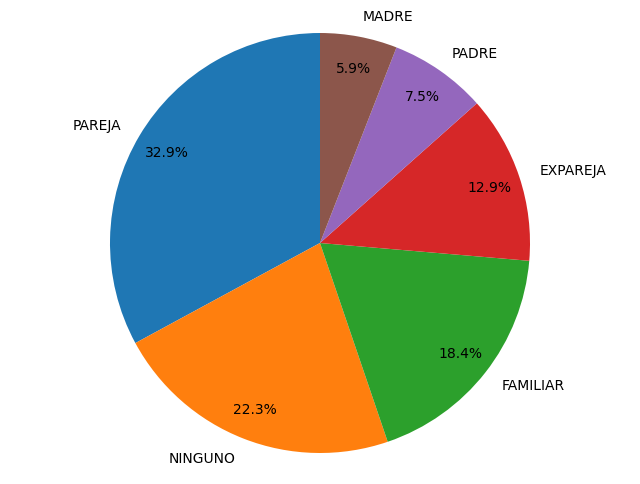

In [ ]:


relacion_victima_distribution_1 = relacion_victima_distribution.iloc[0:6,]


labels = relacion_victima_distribution_1['Relacion con la Victima']
sizes = relacion_victima_distribution_1['Total']


fig, ax = plt.subplots(figsize=(8, 6))


ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       pctdistance=0.85, labeldistance=1.1,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

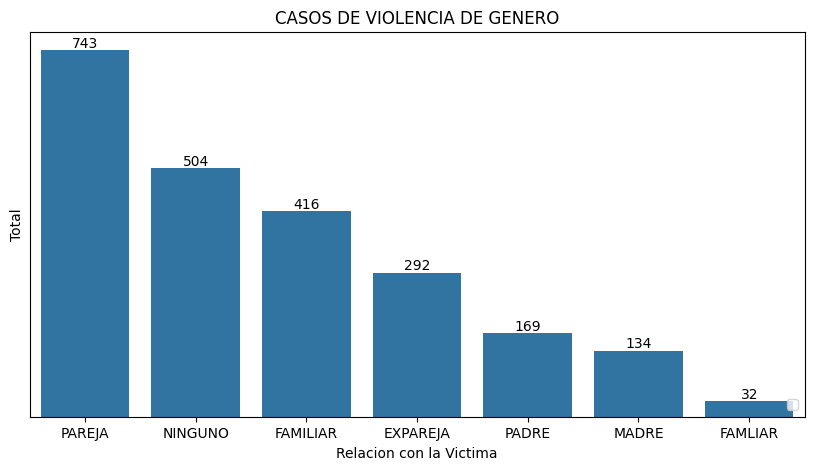

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Relacion con la Victima', y='Total', data=relacion_victima_distribution,
            estimator='sum',
            errorbar=None)
ax.bar_label(ax.containers[0])
plt.yticks([])

# Agregar etiquetas y título
plt.ylabel('Total')
plt.title('CASOS DE VIOLENCIA DE GENERO')
plt.legend(loc='lower right')
plt.show()
# quitar valores eje y

#*ESCENARIOS DE VIOLENCIA*          

A continuacion se presenta un análisis sobre los escenarios donde se presenta con mayor frecuencia la violencia de genero en Tunja.

In [ ]:
escenario_distribution = datasinull['ESCENARIO'].value_counts()
escenario_distribution = escenario_distribution.reset_index()
escenario_distribution = pd.DataFrame(escenario_distribution)
escenario_distribution.columns = ['ESCENARIO', 'Total']

escenario_distribution


,ESCENARIO,Total
0,VIVIENDA,1753
1,OTRO,156
2,VIA PUBLICA,135
3,VÍA PUBLICA,45
4,ESTABLECIMIENTO EDUCATIVO,41
5,LUGAR DE TRABAJO,30
6,VIA PULBICA,28
7,OTROS ESPACIOS ABIERTOS,19
8,VÍA PÚBLICA,16
9,COMERCIO Y AREAS DE SERVICIOS,12


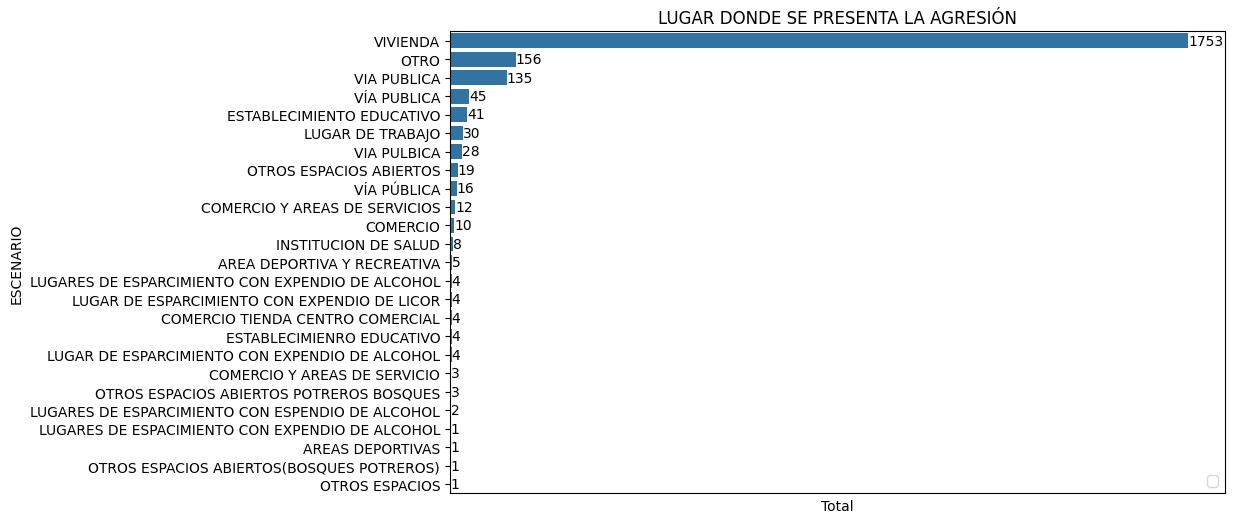

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Total', y='ESCENARIO', data=escenario_distribution,
            estimator='sum',
            errorbar=None)
ax.bar_label(ax.containers[0])
plt.xticks([])

plt.title('LUGAR DONDE SE PRESENTA LA AGRESIÓN')
plt.legend(loc='lower right')
plt.yticks(rotation=0)
plt.show()

#TENDENCIA DE LOS CASOS DE VIOLENCIA DE GENERO

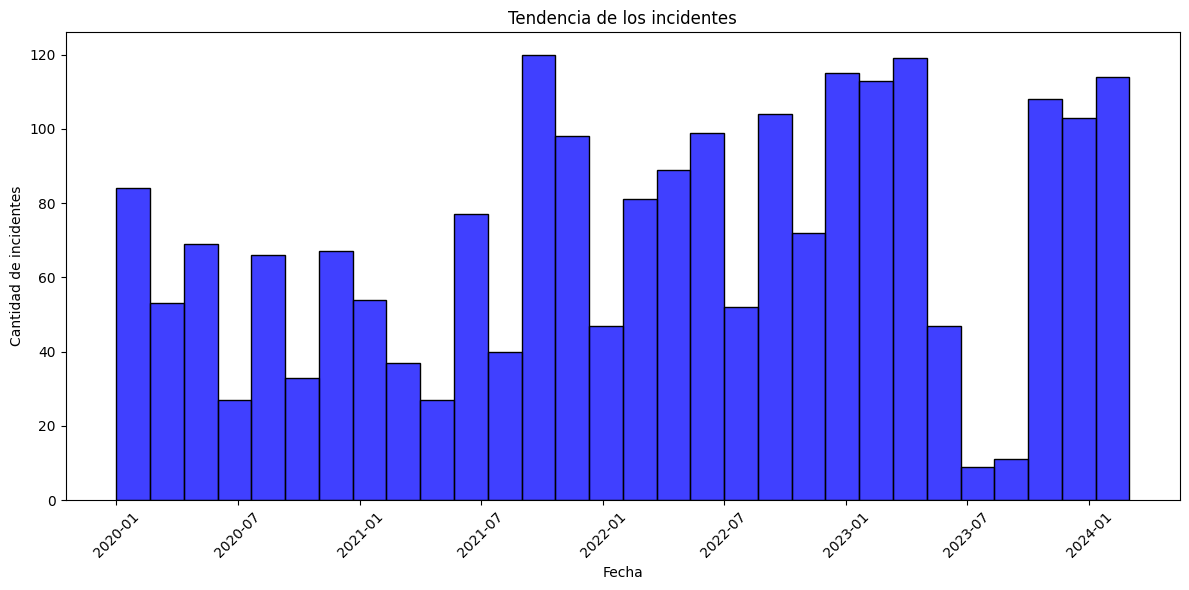

In [ ]:
incident_trends = datasinull['FECHA_DEL_HECHO'].dt.to_period('M').value_counts().sort_index()
incident_trends = incident_trends.reset_index()
incident_trends = incident_trends[incident_trends['FECHA_DEL_HECHO'] >= '2020-01']
incident_trends.columns = ['Fecha', 'Total']
incident_trends

# Convertir la columna 'Fecha' al tipo timestamp
incident_trends['Fecha'] = incident_trends['Fecha'].dt.to_timestamp()

# Graficar el histograma
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=incident_trends, x='Fecha', weights='Total', color='blue', bins=30)
plt.xticks(rotation=45)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de incidentes')
ax.set_title('Tendencia de los incidentes')
plt.tight_layout()
plt.show()


#Dataset Estrato social y Genero:          

*Genero y Estrato Social*

A continuacion se presenta una la extreaccion de y analisis del dataset *VIOLENCIA DE GENETO EN TUNJA*, en la cual se realiza entre las caterias de estrato social y genero de la victima

In [ ]:
est_ = data[['SEXO_DE_LA_VICTIMA', 'ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']].copy()
est_m = est_[est_['SEXO_DE_LA_VICTIMA']=='MASCULINO']
est_f = est_[est_['SEXO_DE_LA_VICTIMA']=='FEMENINO']
#Estrado 0
est_0_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==0].shape[0]
est_0_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==0].shape[0]
#Estrado 1
est_1_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==1].shape[0]
est_1_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==1].shape[0]
#Estrado 2
est_2_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==2].shape[0]
est_2_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==2].shape[0]
#Estrado 3
est_3_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==3].shape[0]
est_3_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==3].shape[0]
#Estrado 4
est_4_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==4].shape[0]
est_4_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==4].shape[0]
#Estrado 5
est_5_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==5].shape[0]
est_5_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==5].shape[0]
#Estrado 6
est_6_m =  est_m[est_m['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==6].shape[0]
est_6_f =  est_f[est_f['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA']==6].shape[0]

# Nuevo DataFrame sobre estrato y genero
EST_2 = {

    'ESTRATO'  : [0, 1, 2, 3, 4, 5, 6],
    'MASCULINO': [est_0_m, est_1_m, est_2_m, est_3_m, est_4_m, est_5_m, est_6_m],
    'FEMENINO' : [est_0_f, est_1_f, est_2_f, est_3_f, est_4_f, est_5_f, est_6_f]
}
dta2 = pd.DataFrame(EST_2)
dta2

,ESTRATO,MASCULINO,FEMENINO
0,0,3,11
1,1,77,430
2,2,133,721
3,3,122,619
4,4,30,117
5,5,7,19
6,6,0,1


In [ ]:
dta = pd.DataFrame(data).copy()

# Eliminar espacios adicionales en los nombres de las columnas
dta.columns = dta.columns.str.strip()

# Crear un diccionario para almacenar los conteos
est_counts_data = {'ESTRATO': [], 'MASCULINO': [], 'FEMENINO': []}

# Obtener valores únicos de estrato
estratos = sorted(dta['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA'].unique())

# Iterar sobre cada estrato y contar por género
for estrato in estratos:
    est_m = dta[(dta['SEXO_DE_LA_VICTIMA'] == 'MASCULINO') & (dta['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA'] == estrato)].shape[0]
    est_f = dta[(dta['SEXO_DE_LA_VICTIMA'] == 'FEMENINO') & (dta['ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA'] == estrato)].shape[0]
    est_counts_data['ESTRATO'].append(estrato)
    est_counts_data['MASCULINO'].append(est_m)
    est_counts_data['FEMENINO'].append(est_f)

# Crear el DataFrame final
est_counts = pd.DataFrame(est_counts_data)

# Mostrar el DataFrame resultante
print(est_counts)

   ESTRATO  MASCULINO  FEMENINO
0      0.0          3        11
1      1.0         77       430
2      2.0        133       721
3      3.0        122       619
4      4.0         30       117
5      5.0          7        19
6      6.0          0         1


In [ ]:
import plotly.express as px
fig = px.bar(dta2, x='ESTRATO', y=['MASCULINO', 'FEMENINO'], barmode='group')
fig.update_layout(
    title="Relacion entre Estrato y Genero",
    xaxis_title="Estrato",
    yaxis_title="Cantidad"
)
fig.show()

**DataFrame:**          *Frecuencia de edad por genero*

#Grafico rango de edad por genero

In [ ]:

# Crear una copia del DataFrame con las columnas necesarias EDAD_DE_LA_VICTIMA
dta3 = datasinull[['EDAD_DE_LA_VICTIMA', 'SEXO_DE_LA_VICTIMA']].copy()

# Crear rangos de edad con pd.cut
dta3['Rango_Edad'] = pd.cut(dta3['EDAD_DE_LA_VICTIMA'], 10)

# Agrupar por sexo y rango de edad, y contar el tamaño de cada grupo
f_dta3 = pd.DataFrame(dta3.groupby(['SEXO_DE_LA_VICTIMA', 'Rango_Edad']).size(), columns=['Cantidad'])

# Restablecer el índice para tener columnas separadas
f_dta3.reset_index(inplace=True)

# Pivotar la tabla para obtener las columnas separadas para cada sexo
pivot_df = f_dta3.pivot(index='Rango_Edad', columns='SEXO_DE_LA_VICTIMA', values='Cantidad')

# Restablecer el índice para que Rango_Edad sea una columna
pivot_df.reset_index(inplace=True)

# Renombrar las columnas para mayor claridad
pivot_df.columns.name = None  # Eliminar el nombre de las columnas
pivot_df.columns = ['Rango_Edad', 'Femenino', 'Masculino']

# Mostrar el DataFrame final
print(pivot_df)


     Rango_Edad  Femenino  Masculino
0  (0.91, 10.0]       147        100
1  (10.0, 19.0]       515        106
2  (19.0, 28.0]       505         51
3  (28.0, 37.0]       355         37
4  (37.0, 46.0]       194         36
5  (46.0, 55.0]       115         13
6  (55.0, 64.0]        36         12
7  (64.0, 73.0]        31          5
8  (73.0, 82.0]        17          8
9  (82.0, 91.0]         3          4


<ipython-input-145-6a38d99197e5>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import plotly.express as px

# Convert 'Rango_Edad' to strings for Plotly compatibility
pivot_df['Rango_Edad'] = pivot_df['Rango_Edad'].astype(str)
Masculino = pivot_df['Masculino'].mean()
Femenino = pivot_df['Femenino']
fig = px.bar(pivot_df, x='Rango_Edad', y=['Femenino', 'Masculino'], barmode='group')
fig.show()
print(Masculino)
#cambiar orientacion del eje x

37.2


In [ ]:
datasinull.describe()

,ID_ANO,EDAD_DE_LA_VICTIMA,ESTRATO_SOCIECONOMICO_DE_LA_VICTIMA
count,2290.000000,2290.000000,2290.000000
mean,2021.941921,26.523581,2.254148
std,1.245223,15.477054,0.933360
min,2020.000000,1.000000,0.000000
25%,2021.000000,15.000000,2.000000
50%,2022.000000,24.000000,2.000000
75%,2023.000000,35.000000,3.000000
max,2024.000000,91.000000,6.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos
cantidad_vs_años = datasinull[['SEXO_DE_LA_VICTIMA', 'ID_ANO']]
cantidad_vs_años = cantidad_vs_años.groupby('ID_ANO').count()
cantidad_vs_años

,SEXO_DE_LA_VICTIMA
ID_ANO,
2020,392
2021,437
2022,605
2023,624
2024,232




---



#GRAFICOS GEOESPACIALES

##*Dataset:*
###Barrios con mayor frecuencia de casos de violencia de genero en Tunja

In [ ]:

Barrios_victimas = data['BARRIO_DE_LA_VICTIMA'].value_counts()
Barrios_victimas = pd.DataFrame(Barrios_victimas)
Barrios_victimas = Barrios_victimas.reset_index()
Barrios_victimas.columns = ['barrio', 'Total']
Barrios_victimas

,barrio,Total
0,LIBERTADOR,114
1,ANTONIA SANTOS,96
2,CENTRO,85
3,ALTAMIRA,61
4,DOÑA EVA,58
...,...,...
282,VEREDA EL PORVENIR,1
283,LA SIBERIA,1
284,COJINES DEL SAQUE,1
285,NAZARET,1


In [ ]:
barrio_victima = data.copy()

# Correccion de algunos datos sobre el BARRIO DE LA VICTIMA
barrio_victima['AREA_DE_RESIDENCIA_DE_LA_VICTIMA'] = barrio_victima['AREA_DE_RESIDENCIA_DE_LA_VICTIMA'].replace(['CABECERA MUNCIPAL', 'CABECERA MUNICIPAL'], 'CABECERA MUNICIPAL')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['20 JULIO', '20 DE JULIO'], '20 DE JULIO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['20/07/2024', '20 DE JULIO'], '20 DE JULIO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALAMEDA UNICENTRO', 'ALAMEDA'], 'ALAMEDA')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALAMEDA BOSQUE', 'ALAMEDA DEL BOSQUE'], 'ALAMEDA DEL BOSQUE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['15 DE MAYO', 'QUINCE DE MAYO'], 'QUINCE DE MAYO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALCALÁ REAL', 'ALCALA REAL'], 'ALCALA REAL')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ASIS BOYASENCE', 'ASIS BOYACENSE'], 'ASIS BOYACENSE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ASIS', 'ASIS BOYACENSE'], 'ASIS BOYACENSE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['BUENAVISTA', 'BUENA VISTA'], 'BUENA VISTA')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['BACHUE', 'VILLA BACHUE'], 'VILLA BACHUE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALTOS DE CANAPRO', 'CANAPRO'], 'CANAPRO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALTOS COOSERVICIOS', 'ALTOS DE COOSERVICIOS'], 'ALTOS DE COOSERVICIOS')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALTOS DE ARBOLEDA', 'ARBOLEDA'], 'ARBOLEDA')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALTOS DEL PARAISO', 'PARAISO'], 'PARAISO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['COLINAS DEL ZUE', 'COLINAS DE ZUE'], 'COLINAS DEL ZUE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['COLINAS DE SUE', 'COLINAS DEL ZUE'], 'COLINAS DEL ZUE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ALTOS DE ZUE', 'COLINAS DEL ZUE'], 'COLINAS DEL ZUE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['CALLEJA', 'LA CALLEJA'], 'LA CALLEJA')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['LOS PATRIOTIAS', 'LOS PATRIOTAS'], 'LOS PATRIOTAS')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['MANZANARES', 'MANZANAREZ'], 'MANZANARES')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['ESTANCIA ROBLE', 'ESTANCIA EL ROBLE'], 'ESTANCIA EL ROBLE')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['CARMEN', 'EL CARMEN'], 'EL CARMEN')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['TRIUNFO', 'ALTOS DEL TRIUNFO'], 'ALTOS DEL TRIUNFO')
barrio_victima['BARRIO_DE_LA_VICTIMA'] = barrio_victima['BARRIO_DE_LA_VICTIMA'].replace(['AMERICAS', 'LAS AMERICAS'], 'LAS AMERICAS')
barrio_victima.drop(barrio_victima[barrio_victima['BARRIO_DE_LA_VICTIMA'] == 'ALTOS DE SAN DIEGO'].index, inplace=True)
barrio_victima.drop(barrio_victima[barrio_victima['BARRIO_DE_LA_VICTIMA'] == 'B SAN LAUREANO'].index, inplace=True)
barrio_victima.drop(barrio_victima[barrio_victima['BARRIO_DE_LA_VICTIMA'] == 'AMPARO DE NIÑOS'].index, inplace=True)
barrio_victima.drop(barrio_victima[barrio_victima['BARRIO_DE_LA_VICTIMA'] == 'ANDES'].index, inplace=True)
barrio_victima = barrio_victima[barrio_victima['AREA_DE_RESIDENCIA_DE_LA_VICTIMA'] == 'CABECERA MUNICIPAL']
# obtimizar con json diccionario

# Contamos la cantidad de victimas por barrios
barrio_victima = barrio_victima['BARRIO_DE_LA_VICTIMA'].value_counts()
barrio_victima = pd.DataFrame(barrio_victima)
barrio_victima = barrio_victima.reset_index()
barrio_victima.columns = ['barrio', 'Total']
barrio_victima.sort_values(by='Total', ascending=False)

,barrio,Total
0,LIBERTADOR,114
1,ANTONIA SANTOS,96
2,CENTRO,85
3,ALTAMIRA,61
4,DOÑA EVA,58
...,...,...
186,CASTILLOS DEL NORTE,1
185,REMANSOS DE SANTA INES,1
184,CHORRO BLANCO,1
182,PARQUES DE NOGAL,1


In [ ]:
info_barrios = info_barrio.iloc[:,[1, 3, 4]]
info_barrios.sort_values(by='barrio', ascending=True)

,barrio,latitud,longitud
12,20 DE JULIO,5.542224,-73.362821
104,ALAMEDA,5.558434,-73.346814
105,ALAMEDA DEL BOSQUE,5.558434,-73.346814
106,ALCALA REAL,5.573531,-73.333912
107,ALTAGRACIA,5.557096,-73.342384
...,...,...,...
91,VILLA UNIVERSITARIA,5.548224,-73.356700
140,VILLAS DEL LAGO,5.571630,-73.333654
52,VILLAS DEL NORTE,5.570990,-73.345563
134,VILLITA,5.564305,-73.334835


In [ ]:
barrio_total_victima = barrio_victima.merge(info_barrios, on='barrio', how='right')
barrio_total_victima.dropna(inplace=True)
barrio_total_victima.sort_values(by='Total', ascending=False)

,barrio,Total,latitud,longitud
1,LIBERTADOR,114.0,5.520352,-73.369682
3,ANTONIA SANTOS,96.0,5.512022,-73.366871
8,CENTRO,85.0,5.532325,-73.361635
4,ALTAMIRA,61.0,5.544016,-73.369274
5,DOÑA EVA,58.0,5.517639,-73.363717
...,...,...,...,...
95,POZO DE DONATO,1.0,5.551213,-73.353052
94,LA COLINA,1.0,5.554161,-73.358052
91,VILLA UNIVERSITARIA,1.0,5.548224,-73.356700
83,PRADO DE SAN LUIS,1.0,5.531501,-73.346057


In [ ]:
import folium #importando dependencias del mapa
mapa_tunja = folium.Map(location=[5.538771, -73.357116], zoom_start=13) #creando el mapa

for index, row in barrio_total_victima.iterrows():
    folium.Marker([row['latitud'], row['longitud']], popup=row['barrio']).add_to(mapa_tunja)

mapa_tunja

In [ ]:
import folium
from folium.plugins import HeatMap
locations = barrio_total_victima[['latitud', 'longitud', 'Total']].values.tolist()

tunja_map = folium.Map(location=[5.5450, -73.357116], zoom_start=13)
HeatMap(locations).add_to(tunja_map)
tunja_map

# REGRECION LINEAL SIMPLE EN COSAS DE VIOLENCIA DE GENERO

Mean Squared Error: 0.13388890262710354
R^2 Score: 0.0007090634879290958


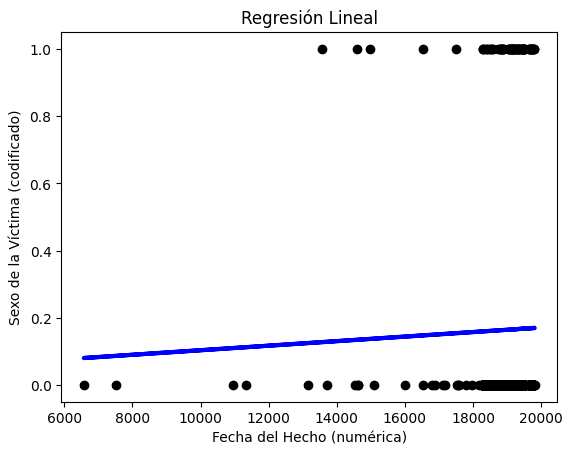

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


datasinull['FECHA_DEL_HECHO'] = pd.to_datetime(datasinull['FECHA_DEL_HECHO'], format='%d/%m/%Y', errors='coerce')
datasinull['FECHA_DEL_HECHO_NUM'] = (datasinull['FECHA_DEL_HECHO'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
datasinull['SEXO_DE_LA_VICTIMA'] = datasinull['SEXO_DE_LA_VICTIMA'].astype('category').cat.codes

X = datasinull['FECHA_DEL_HECHO_NUM'].values.reshape(-1, 1)  # Asegúrate de que X tiene la forma adecuada
y = datasinull['SEXO_DE_LA_VICTIMA'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Paso 7: Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Fecha del Hecho (numérica)')
plt.ylabel('Sexo de la Víctima (codificado)')
plt.title('Regresión Lineal')
plt.show()
